In [36]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv

In [37]:
class controlRun:
    #list of controlVars
    #read one
    #read all
    pass
class controlVar:
    #searchstring
    #type: output? input? controllledVar? state?
    #
    pass

In [38]:
logFilename = "log.symm18"
#preallocate estimate of list size
defaultSize = int(5e5)
omegaT = [0] * defaultSize
angleT = [0] * defaultSize
errorT = [0] * defaultSize
integralErrorT = [0] * defaultSize
differentialErrorT = [0] * defaultSize
rawOmegaT = [0] * defaultSize
rawAngleT = [0] * defaultSize
controlledVarT = [0] * defaultSize
Time = [0] * defaultSize
namesList = ["Time","Cl","omega","angle","error","integralError","differentialError","rawOmega","rawAngle"]
varList = [Time,controlledVarT,omegaT,angleT,errorT,integralErrorT,differentialErrorT,rawOmegaT,rawAngleT]
searchList = ["Time =","Controlled Variable Cl:","Saturated omega","Saturated angle","error  ","errorIntegral","errorDifferential","Raw omega","Raw angle"]

In [39]:
def searchvars(searchList,varList,fname,trigger):
    readControl = False
    f = open(fname,'r')
    count = 0
    countList = [0] * len(varList)
    length = 0
    startTime = 0
    for line in f:
        if not readControl:
            if "Time =" in line and "ExecutionTime" not in line:
                startTime = float(line.split()[-1])
            count +=1
            if trigger in line:
                readControl = True
                print("starting to read at line ",count)
                print("Start time= ", startTime," s")
                varList[0][0] = startTime
                countList[0] = 1
            continue

        #print(line)
        for elem,search in enumerate(searchList):
            #print(search)
            #print(search,"elem",elem)
            if search in line:
                if "ExecutionTime" in line:
        #            print("here")
                    break
                lineList = line.split() 
                num = float(lineList[-1].replace(';','')) #catch the number
                #print("Catched ",search,"value: ",num)
                varList[elem][countList[elem]] = num
                countList[elem] += 1
        count += 1
        #if count > 200:
        #    break
    length = max(countList)
    print("Number of timesteps: ",length)
    f.close()
    returnList = [0] * len(varList)
    for elem, var in enumerate(varList):
        returnList[elem] = var[0:length]
    print(countList)
    return returnList

In [41]:
def read_residuals(filename):
    postprocstr="postProcessing/residuals/3/"
    searchstr = postprocstr + filename
    resdf = read_csv(searchstr,sep='\t',header=1,)
    print(resdf.head())
    newcols = [label.replace(' ','') for label in resdf.columns]
    resdf = resdf.rename(columns=dict(zip(resdf.columns,newcols)))
    resdf = resdf.rename(columns={newcols[0]: 'Time'})
    print(resdf.columns)
    resdf.head()
    return resdf
def plot_residuals(df,varList=['p_initial','Ux_initial','Uy_initial'],title=True):
    plt.figure()
    df.plot(x='Time',y=varList,logy=True)


In [40]:
varList = searchvars(searchList,varList,logFilename,"meanValue is:")

starting to read at line  854255
Start time=  1.0  s
Number of timesteps:  165395
[165395, 165395, 165395, 165395, 165395, 165395, 165395, 165395, 165395]


In [46]:
## Plotting routines
varDict = dict(zip(namesList,varList))
varDict["angle"] = [i*(-180)/np.pi for i in varDict["angle"]]
setPoint1 = [0.15] * len(varList[0])
setPoint2 = [0.3] * len(varList[0])


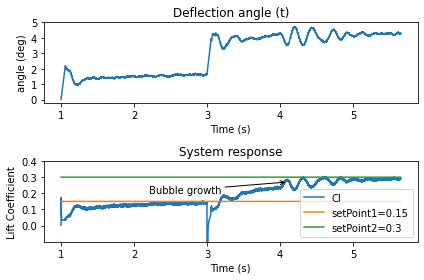

In [54]:
fig, axs = plt.subplots(2,1)
axs[0].plot(varDict["Time"],varDict["angle"],label="deflection angle")
axs[0].set_title("Deflection angle (t)")
axs[0].set_ylabel("angle (deg)")
axs[0].set_xlabel("Time (s)")
axs[0].set_yticks(np.arange(0,6,1))
#axs[0].set_xticks(np.arange(0,10,1))
"""ax2 = axs[0].twinx()
ax2.plot(varDict["Time"],varDict["omega"],'r+',label=r'$\omega$')
ax2.set_ylabel("omega (rad/s)")
"""
axs[1].plot(varDict["Time"],varDict["Cl"],label="Cl")
axs[1].plot(varDict["Time"],setPoint1,label="setPoint1=0.15")
axs[1].plot(varDict["Time"],setPoint2,label="setPoint2=0.3")
#axs[1].plot(varDict["Time"],varDict["error"],label="Error")
axs[1].set_title("System response")
axs[1].set_ylabel("Lift Coefficient")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylim([-0.1,0.4])
axs[1].set_yticks(np.arange(0,0.5,0.1))
axs[1].annotate("Bubble growth",xy=(4.1,0.27),xytext=(2.2,0.2),arrowprops=dict(facecolor='black',arrowstyle='->'))
#axs[1].set_xticks(np.arange(0,10,1))
axs[1].legend(loc='lower right')
axs[0].set_facecolor('white')
axs[1].set_facecolor('white')
fig.tight_layout()
fig.savefig("18ms_hydro_control.png",dpi=1000)

In [20]:
residuals = read_residuals("solverInfo_3.dat")

   # Time         alpha.water_solver  alpha.water_initial  alpha.water_final  \
0         3.00003       smoothSolver             0.008181       6.520110e-09   
1         3.00003       smoothSolver             0.000769       1.882300e-12   
2         3.00003       smoothSolver             0.003579       3.333680e-13   
3         3.00003       smoothSolver             0.000331       2.193880e-13   
4         3.00003       smoothSolver             0.002966       6.448970e-13   

   alpha.water_iters  alpha.water_converged k_solver        k_initial       \
0                  2                   True   smoothSolver        0.014207   
1                  1                   True   smoothSolver        0.000001   
2                  1                   True   smoothSolver        0.000002   
3                  1                   True   smoothSolver        0.991681   
4                  1                   True   smoothSolver        0.000027   

   k_final         k_iters         ...  cellDispla

In [23]:
residuals.columns

Index(['Time', 'alpha.water_solver', 'alpha.water_initial',
       'alpha.water_final', 'alpha.water_iters', 'alpha.water_converged',
       'k_solver', 'k_initial', 'k_final', 'k_iters', 'k_converged',
       'p_rgh_solver', 'p_rgh_initial', 'p_rgh_final', 'p_rgh_iters',
       'p_rgh_converged', 'cellDisplacement_solver',
       'cellDisplacementx_initial', 'cellDisplacementx_final',
       'cellDisplacementx_iters', 'cellDisplacementy_initial',
       'cellDisplacementy_final', 'cellDisplacementy_iters',
       'cellDisplacement_converged', 'omega_solver', 'omega_initial',
       'omega_final', 'omega_iters', 'omega_converged'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

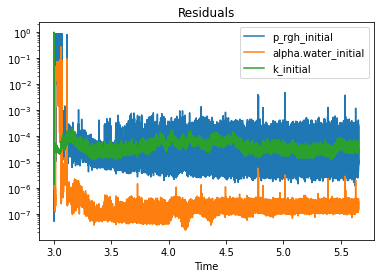

In [57]:
plt.figure()
residuals.plot(x='Time',y=['p_rgh_initial','alpha.water_initial','k_initial'],logy=True)
#residuals.plot(x='Time',y=['p_rgh_initial'],logy=True)
plt.title("Residuals")
#plt.annotate("Control activation",xy=(3,0.05),xytext=(1,0.6),arrowprops=dict(facecolor='black',arrowstyle='->'))
plt.savefig("18msresiduals.png",dpi=800)